In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
def loadDataSet(filename):
    print("Carregando a base de dados...")
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    print("ok!")
    return X, y

In [37]:
def fillMissingData(X):
    print("Preenchendo dados que estão faltando...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,1:] = imputer.fit_transform(X[:,1:])
    print("ok!")
    return X

In [38]:
def computeCategorization(X):
    print("Computando rotulação...")
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    D = pd.get_dummies(X[:,0])
    X = X[:,1:]
    X = np.insert(X, 0, D.values, axis=1)
    print("ok!")
    return X

In [39]:
def splitTrainTestSets(X, y, testSize):
    print("Separando conjuntos de teste e treino...")
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    print("ok!")
    return XTrain, XTest, yTrain, yTest

In [40]:
def computeNormalization(XTrain, XTest):
    print("Computando Normalização...")
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    XTrain = scaleX.fit_transform(XTrain)
    XTest = scaleX.fit_transform(XTest)
    print("ok!")
    return XTrain, XTest

In [44]:
def computeLinearRegression(XTrain, yTrain, XTest, yTest):
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    print("Computando Regressão Linear...")
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)
    print("ok!")

    print(XTest[:,-1])


    plt.scatter(XTest[:,-1], yTest, color = 'red')
    plt.plot(XTest[:,-1], color='blue')
    plt.title("Inscritos x Visualizações")
    plt.xlabel("Inscritos")
    plt.ylabel("Visualizações")
    plt.show()

In [73]:
def runLinearRegressionExample():
    X, y = loadDataSet("svbr.csv")
    X = fillMissingData(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.7)
    computeLinearRegression(XTrain, yTrain, XTest, yTest)

Carregando a base de dados...
ok!
Preenchendo dados que estão faltando...
ok!
Computando rotulação...
ok!
Separando conjuntos de teste e treino...
ok!
Computando Regressão Linear...
ok!
Coeficiente de Determinação (R²): -0.31419904001682686
Erro Médio Quadrático (RMSE): 23116517.50969931


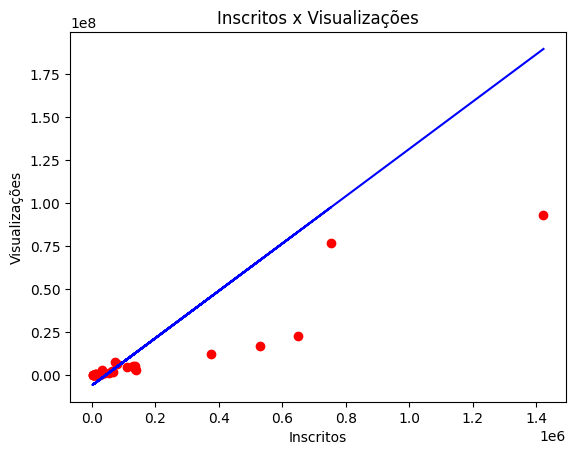

In [74]:
if __name__ == "__main__":
    runLinearRegressionExample()

In [33]:
baseDeDados = pd.read_csv("admission.csv", delimiter=';')
baseDeDados

,Name,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Approval
0,Lucas,337,118,4,4.5,4.5,9.65,1,1
1,Ana,324,107,4,4.0,4.5,8.87,1,1
2,Jose,316,104,3,3.0,3.5,8.00,1,1
3,Carlos,322,110,3,3.5,2.5,8.67,1,1
4,Zileide,314,103,2,2.0,3.0,8.21,0,0
5,Joana,330,115,5,4.5,3.0,9.34,1,1
6,Davi,321,109,3,3.0,4.0,8.20,1,1
7,Daniel,308,101,2,3.0,4.0,7.90,0,0
8,Marcelo,302,102,1,2.0,1.5,8.00,0,0


In [50]:
def fillMissingData(X):
    print("Preenchendo dados que estão faltando...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:, 1:] = imputer.fit_transform(X[:, 1:])
    print("ok!")
    return X

In [51]:
def computeCategorization(X):
    print("Computando rotulação...")
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    D = pd.get_dummies(X[:, 0])
    X = X[:, 1:]
    X = np.insert(X, 0, D.values, axis=1)
    print("ok!")
    return X

In [57]:
def computeLinearRegression(XTrain, yTrain, XTest, yTest):
    print("Computando Regressão Linear...")
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)
    print("ok!")

    # Avaliar a qualidade do modelo
    r2 = r2_score(yTest, yPred)
    rmse = np.sqrt(mean_squared_error(yTest, yPred))
    print("Coeficiente de Determinação (R²):", r2)
    print("Erro Médio Quadrático (RMSE):", rmse)

    # Plotar o gráfico de dispersão com a linha de regressão
    plt.scatter(XTest[:, -1], yTest, color='red')
    plt.plot(XTest[:, -1], yPred, color='blue')
    plt.title("Inscritos x Visualizações")
    plt.xlabel("Inscritos")
    plt.ylabel("Visualizações")
    plt.show()

In [58]:
def runLinearRegressionExample():
    X, y = loadDataSet("admission.csv")
    X = fillMissingData(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)
    
    # Realizar normalização
    scaler = StandardScaler()
    XTrain = scaler.fit_transform(XTrain)
    XTest = scaler.transform(XTest)

    computeLinearRegression(XTrain, yTrain, XTest, yTest)

Carregando a base de dados...
ok!
Preenchendo dados que estão faltando...
ok!
Computando rotulação...
ok!
Computando Regressão Linear...
ok!
Coeficiente de Determinação (R²): 0.7452457956846179
Erro Médio Quadrático (RMSE): 0.2523659071246461


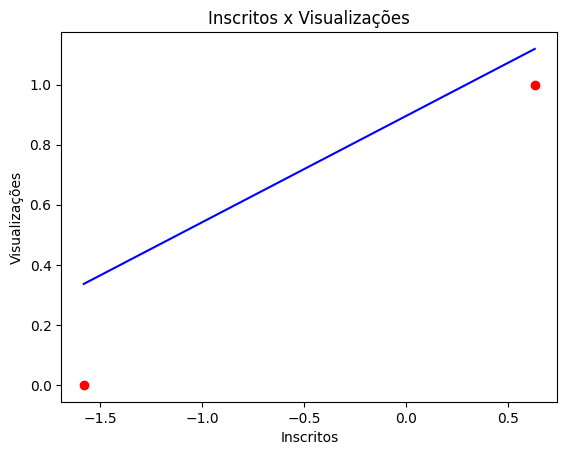

In [59]:
if __name__ == "__main__":
    runLinearRegressionExample()

In [66]:
# Carregar a base de dados
data = {
    'Nome': ['Lucas', 'Ana', 'Jose', 'Carlos', 'Zileide', 'Joana', 'Davi', 'Daniel', 'Marcelo'],
    'PTS': [337, 324, 316, 322, 314, 330, 321, 308, 302],
    'J': [118, 107, 104, 110, 103, 115, 109, 101, 102],
    'V': [4, 4, 3, 3, 2, 5, 3, 2, 1],
    'E': [4.5, 4.0, 3.0, 3.5, 2.0, 4.5, 3.0, 3.0, 2.0],
    'D': [4.5, 4.5, 3.5, 2.5, 3.0, 3.0, 4.0, 4.0, 1.5],
    'GP': [9.65, 8.87, 8.0, 8.67, 8.21, 9.34, 8.2, 7.9, 8.0],
    'Classificado': [1, 1, 1, 1, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

In [61]:
df

,Nome,PTS,J,V,E,D,GP,Classificado
0,Lucas,337,118,4,4.5,4.5,9.65,1
1,Ana,324,107,4,4.0,4.5,8.87,1
2,Jose,316,104,3,3.0,3.5,8.00,1
3,Carlos,322,110,3,3.5,2.5,8.67,1
4,Zileide,314,103,2,2.0,3.0,8.21,0
5,Joana,330,115,5,4.5,3.0,9.34,1
6,Davi,321,109,3,3.0,4.0,8.20,1
7,Daniel,308,101,2,3.0,4.0,7.90,0
8,Marcelo,302,102,1,2.0,1.5,8.00,0


In [62]:
# Pré-processamento
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Treinamento do modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [63]:
# Coeficientes e intercepto da regressão
coeficientes = regressor.coef_
intercepto = regressor.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Coeficientes: [ 0.08777982 -0.01998828 -0.01370574  0.45991492 -0.25596411 -1.15218492]
Intercepto: -15.974133550288125


In [64]:
# Previsão para novos dados
novos_dados = np.array([[300, 100, 4, 3.5, 3.5, 8.5]])
previsao = regressor.predict(novos_dados)
print("Previsão:", previsao)

Previsão: [-0.77358228]


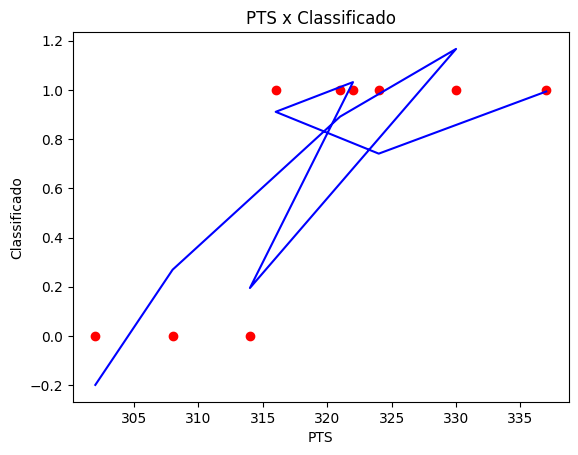

In [65]:
# Visualização dos resultados
plt.scatter(X[:, 0], y, color='red')
plt.plot(X[:, 0], regressor.predict(X), color='blue')
plt.title("PTS x Classificado")
plt.xlabel("PTS")
plt.ylabel("Classificado")
plt.show()

In [67]:
# Pré-processamento
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values


In [68]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Treinamento do modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
# Coeficientes e intercepto da regressão
coeficientes = regressor.coef_
intercepto = regressor.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [-0.03116564  0.07577802  0.66590081  0.22675855 -0.13689862 -0.77306293]
Intercepto: 6.95309894094739


In [71]:
# Previsão para os dados de teste
y_pred = regressor.predict(X_test)

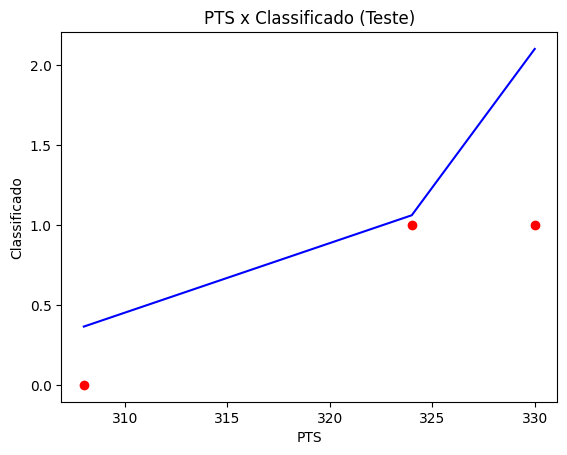

In [72]:
# Visualização dos resultados
plt.scatter(X_test[:, 0], y_test, color='red')
plt.plot(X_test[:, 0], y_pred, color='blue')
plt.title("PTS x Classificado (Teste)")
plt.xlabel("PTS")
plt.ylabel("Classificado")
plt.show()